# COGS 108 - Twitch Streamers Analytics and Prediction

## Final Project Video Link:
https://drive.google.com/file/d/1qqvxH9ZFGwBzhSJi6k71bAFQnI6TwrZg/view?usp=sharing

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ `X` ] YES - make available
* [  ] NO - keep private

# Overview

This project determines which variables such as, follower count, watch time, stream time and age-content, has the most impact on the average amount of viewers a twitch streamer has. The data was gathered from kaggle that observes the varying measurable features of the top 1000 streamers in 2020. The features include, watch time, average peak viewers, follower count, and many more. Once the data was cleaned, the variables that were related to our project were utilized to create visualizations and linear regression models. From our visualizations and data, we observed that watch time and followers count were the strongest predictiors, within the four variables, to determine the average viewers of a twitch streamer. 

# Names

- Sarah Parrilla
- Anush Ghoogasian
- Dayana Casas
- Andrew Zhou
- Xingyu Zhu

<a id='research_question'></a>
# Research Question

### Does the follower count, watch time, stream time and age-content of a twitch streamer predict the number of average viewers a twitch streamer has? Which variable has the most impact on the average amount of viewers a twitch streamer has?

<a id='background'></a>

## Background & Prior Work

#### Background:

Twitch launched in 2011 as an interactive American streaming service and quickly gained popularity through video game streaming and epsorts[1]. As of 2022, the platform has 140 million active users and 7.4 million streamers monthly [2]. As the platform continues to expand globally, competition for the top streamer spot has also increased. Similar to other content media platforms, the more activity your channel has, the more profit you make. Ninja, one of the top Twitch content creator, had about 14 million followers and an estimated 14 million dollar net worth. Twitch has also begun signing exclusivity deals starting 2019 with popular streamers who dominate the ranking for their quantity of subscribers. Since the Twitch algorithm favors viewers, in order to have a large amount of subscribers, it is important to have a great quantity of viewers. The discoverability of streamers depends on viewers which can be achieved through consistent stream time [4]. In order to increase revenue and gain subscribers, it is important to understand the correlation between stream time and viewers. Therefore this begs the question of the follower count and watch time of a twitch streamer predict the number of average viewers a twitch streamer has?

References (include links):
- 1) https://www.twitch.tv/ 
- 2) https://backlinko.com/twitch-users
- 3) https://www.little-loans.com/gamers-rich-list 
- 4) https://streamersplaybook.com/why-is-it-so-hard-to-get-viewers-on-twitch/ 





#### Prior Work: 

What has already been done?
Researchers at Kennesaw State University observed and analyzed the statistics of the top streamers on Twitch to see which characteristics are needed to become a successful streamer. The variables they focused on are average viewership, follower count, and language of the stream. As a result, they concluded that there were no significant differences of average follower count between mature and non-mature content. Additionally they did not observe significant differences in the average viewership between the two types of content. However, they did state that they found positive correlation for follower count and peak viewership [1].
 
Reference: 
- 1) https://datascience.kennesaw.edu/docs/analytics-day-2021-student-presentations-docs/undergrad-presentations/An%20Analysis%20of%20Twitch%20Viewership%20Data.pdf 

# Hypothesis


Our hypothesis is that the number of followers, mature content, and the watch time of a twitch streamer would be the best predictor of the number of  average viewers that a streamer has and that followers have a stronger impact on the number of average viewers. The reasoning for this is that the more followers a streamer has, it is more likely that the user has a high number of average viewers. Moreover, a high average viewer count would likely correlate with a large watchtime because watchtime would be the time spent watching the streamer. 

# Dataset(s)


- Dataset Name: Top Sreamers on Twitch
- Link to the dataset: https://www.kaggle.com/aayushmishra1512/twitchdata/version/3
- Number of observations: 1000


*Dataset description:*

This is a semi-structured dataset consisting of viewer, follower statistics of the top 1000 streamers on Twitch in 2020 on kaggle.com. There are 10 features for each of the 1000 observations, including measurable features such as watch time, peak viewers, followers and binary classified features such as mature, partnered. 

# Setup

In [1]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in dataset
dataset = pd.read_csv('./TopStreamersonTwitch.csv')

# Data Cleaning

#### Data cleaning steps description:

In order to clean our dataset, we decided to drop the “partnered”, “views_gained” and “followers_gained”, “peak_viewers” variables. We removed “peak_viewers” since it is an outlier and can be inconsistent. Observing when a channel met a peak with their views does not correlate with whether views or subscriber count are important. It could have been a spontaneous event that never occurred again, therefore not showing any consistency. We also removed “followers_gained” from the dataset because we agreed that, especially with very popular twitch streamers, the people that are viewing their content are not always followers. We agreed that it would be difficult to track when these followers were gained and that keeping this in the data would create noise that wasn’t relevant to our research question.  We decided to remove “views_gained” because the variable is hard to measure whether the views were gained in a short period of time or over a long period of time. We do not know whether those viewers continued to watch the streamer or whether they just watched them once during a trend. We decided to remove “partnered” from the dataset because a twitch partnership is more focused on the viewer's experience in a stream rather than the success of a streamer. A twitch partnership allows for the streamer to monetize their stream and give viewers access to emoticons among other things. These things improve the quality of a stream but the status of a streamer’s partnership does not necessarily tell us anything about their success. A majority of the twitch streamers in our dataset are also partnered with twitch so we believe the information is not assorted enough to give us a clear connection between the two factors. 

In [3]:
# create dataframe and add columns
# time is measured in minutes
dataset.columns = ['channel','watch_time','stream_time',
 'peak_viewers','avg_viewers', 'followers',
 'followers_gained', 'views_gained','partnered',
 'mature', 'language']
dataset = dataset.dropna(how='all')
dataset.head()

,channel,watch_time,stream_time,peak_viewers,avg_viewers,followers,followers_gained,views_gained,partnered,mature,language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [4]:
# remove columns mentioned above, the dataframe "data" will be used to build prediction models
data = dataset.drop(columns=['partnered', 'views_gained', 'followers_gained', 'peak_viewers', 'language'])
data.head()

,channel,watch_time,stream_time,avg_viewers,followers,mature
0,xQcOW,6196161750,215250,27716,3246298,False
1,summit1g,6091677300,211845,25610,5310163,False
2,Gaules,5644590915,515280,10976,1767635,True
3,ESL_CSGO,3970318140,517740,7714,3944850,False
4,Tfue,3671000070,123660,29602,8938903,False


# Data Analysis & Results

## EDA and Visualization
In this section, we will visualize the distribution of each variable we want to use as the predictor, and calculate their correlation with average viewer, respectively.

In [5]:
# size of the data
data.shape

(1000, 6)

In [6]:
# get descriptive statistics for quantitative variables
data.describe()

,watch_time,stream_time,avg_viewers,followers
count,1.000000e+03,1000.000000,1000.000000,1.000000e+03
mean,4.184279e+08,120515.160000,4781.040000,5.700541e+05
std,5.496355e+08,85376.201364,8453.684965,8.044134e+05
min,1.221928e+08,3465.000000,235.000000,3.660000e+03
25%,1.631899e+08,73758.750000,1457.750000,1.705462e+05
50%,2.349908e+08,108240.000000,2425.000000,3.180630e+05
75%,4.337399e+08,141843.750000,4786.250000,6.243322e+05
max,6.196162e+09,521445.000000,147643.000000,8.938903e+06


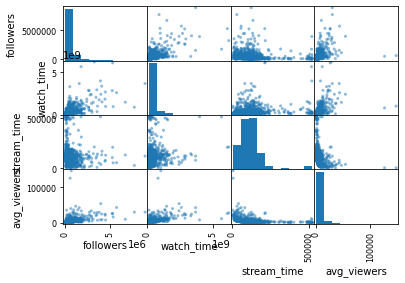

In [7]:
# scatterplot of the variables we want to analyze
fig = pd.plotting.scatter_matrix( data[['followers', 'watch_time', 'stream_time', 'avg_viewers']])

#### In the research question, we are interested in the relationships between follower counts, watch time, stream time, age-content and average viewers of a twitch stream. From the scatter-plot, we can see that the follower counts, follower count and watch time seem to have a positive relationship with average viewers but with many outliers, while stream time seem to have a negative non-linear relationship with average viewers. 
#### Age_content is a True/False binary-classified variable and we are not able to visualize the relationship with the scatter plot. Therefore, we will compare the amount of average viewers of streams that contain mature contents and streams that do not, respectively.

### Mature

In [8]:
# Within the top 1000 channels, 230 of them contain mature contents.
count_mature = data['mature'].value_counts()
count_mature

False    770
True     230
Name: mature, dtype: int64

In [9]:
print('Mature streamers proportion is {mt}%'.format(mt=count_mature[1]/1000 * 100))
print('Non-mature streamers proportion is {mf}%'.format(mf=count_mature[0]/1000*100))

Mature streamers proportion is 23.0%
Non-mature streamers proportion is 77.0%


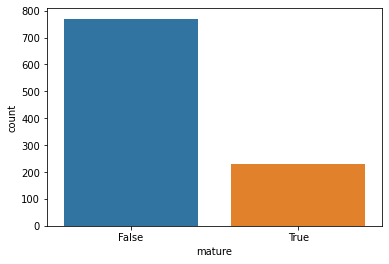

In [10]:
# visualize the above distribution
plot_mature = sns.countplot(x="mature", data = data)

#### In this bar plot we can observe what percentage of the top 1000 channels contain mature content. According to the graph, 770 of the channels (False) were non-mature and 230 of them (True) were mature. Therefore the proportion of non-mature streamers is 77% and mature streamers is 23%.

### Followers

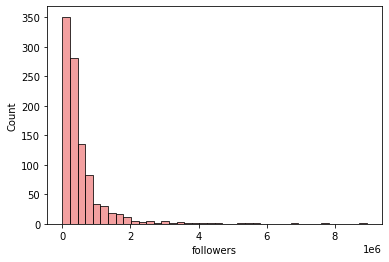

In [11]:
# visualize the distribution of the followers
# not Normally distributed, but are skewed right
plot_follower = sns.histplot(data["followers"], bins = 40, color = 'lightcoral')

#### In this histogram, we want to visualize the distribution of the followers. As can be observed, the distribution is right skewed which shows the average followers the sample size has. We also look at the potential outliers who have a higher follower count than the average streamers.

In [12]:
# look at potential outliers where follower count> 6e6
data[data["followers"]> 6e6]

,channel,watch_time,stream_time,avg_viewers,followers,mature
4,Tfue,3671000070,123660,29602,8938903,False
35,Myth,1479214575,134760,9396,6726893,False
96,shroud,888505170,30240,29612,7744066,False


### Watch time

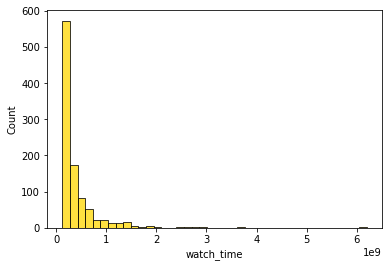

In [13]:
# visualize the distribution of the watch_time
# not Normally distributed, but it is right skewed
plot_watch = sns.histplot(data["watch_time"], bins = 40, color = 'gold')

#### In this histogram we are visualizing the distribution of watch time for the channels. It is not normally distributed and is skewed right. This shows what the common watch time is. We also look at the potential outliers of those who have a higher watch time for their channel.

In [14]:
# look at potential outliers where watch_time > 4e9
data[data["watch_time"]> 4e9]

,channel,watch_time,stream_time,avg_viewers,followers,mature
0,xQcOW,6196161750,215250,27716,3246298,False
1,summit1g,6091677300,211845,25610,5310163,False
2,Gaules,5644590915,515280,10976,1767635,True


### Stream time

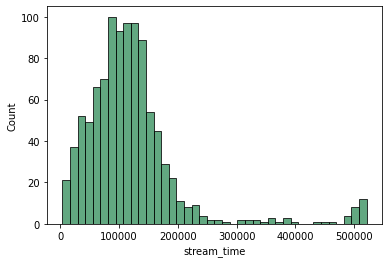

In [15]:
# visualize the distribution of the stream_time
# not Normally distributed, but it's a right skewed distribution
plot_stream = sns.histplot(data["stream_time"], bins = 40, color = 'seagreen')

#### In this histogram we are visualizing the distribution of the stream time from the channels. It is right skewed and shows the average stream time of the channels. We also take a look at the potential outliers where the stream time is higher than the average.

In [16]:
# look at potential outliers where stream_time > 5e5
data[data["stream_time"]> 5e5]

,channel,watch_time,stream_time,avg_viewers,followers,mature
2,Gaules,5644590915,515280,10976,1767635,True
3,ESL_CSGO,3970318140,517740,7714,3944850,False
49,BeyondTheSummit,1339097490,505080,2635,923689,False
232,JohnPitterTV,461605275,508965,900,286184,False
306,RocketBeansTV,360858030,518415,696,416018,False
392,RiffTrax,293583075,521445,562,79099,False
397,SaltyBet,290991045,508140,571,224099,False
417,DownToQuest,281365035,513540,543,82299,True
433,livekiss,269518965,517260,520,31323,False
469,SaltyTeemo,247613265,517980,476,173196,False


### Explore the relationships between follower_count, watch_time, stream_time, maturity and average_viewers

### Followers & averager_viewers

<AxesSubplot:xlabel='avg_viewers', ylabel='Count'>

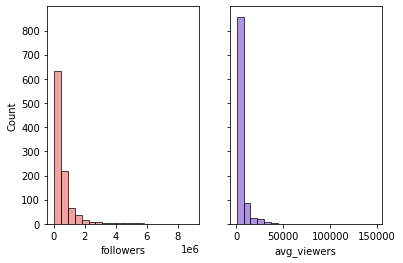

In [17]:
## look at follower count and average viewers
fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = True)
sns.histplot(data['followers'], bins = 20, ax = ax1, color = 'lightcoral')
sns.histplot(data['avg_viewers'], bins = 20, ax = ax2, color = 'mediumpurple')

#### It seems that followers and average viewers are both highly right-skewed meaning that the numbers of followers and average for most of the top 1000 streamers are similar with some deviating with a higher number of followers and average viewers. 


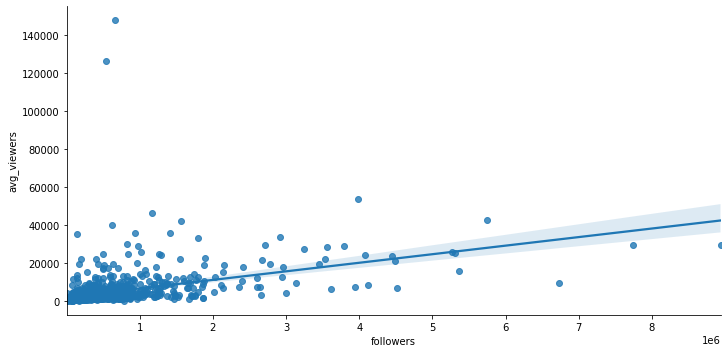

In [18]:
# plot the relationship between the two variables
sns.lmplot(x = 'followers', y = 'avg_viewers',
          data = data, aspect = 2, fit_reg = True)

#### The graph displays that there might be a positive correlation between the number of followers and average viewers with the positive slope of the line but by looking at the histograms, the correlation might not be that strong.

In [19]:
# can remove outliers that are far above the line of fit
data = data[data['avg_viewers']<120000]
data.shape

(998, 6)

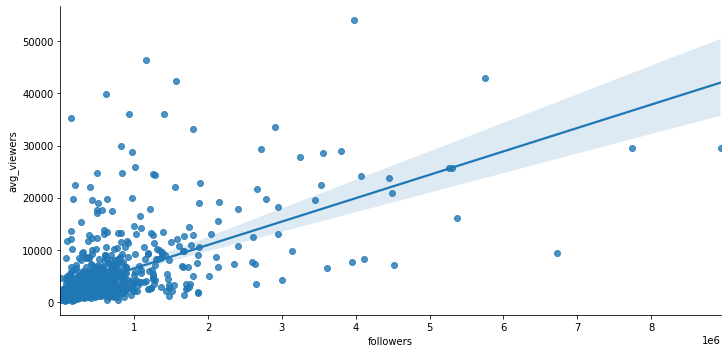

In [20]:
# Replot the relationship between the two variables
sns.lmplot(x = 'followers', y = 'avg_viewers',
          data = data, aspect = 2, fit_reg = True)

#### After removing the outliers from the dataset, the positive correlation between the number of followers and average viewers can be seen easily because the slope of the line is higher compared the dataset with outliers because the outliers skewed the histogram so that the slope of the line would be smaller. 

In [21]:
# calculate correlation between follower count and average viewers
correlation1 = data['followers'].corr(data['avg_viewers'])
correlation1 

0.5997497720448725

#### The correlation between follower count and average viewers after removing the two outliers in average viewer is around 0.5997, which is between 0.5 and 0.7. Therefore, the two variables can be considered moderately correlated.

### Watch_time & averager_viewers

<AxesSubplot:xlabel='avg_viewers', ylabel='Count'>

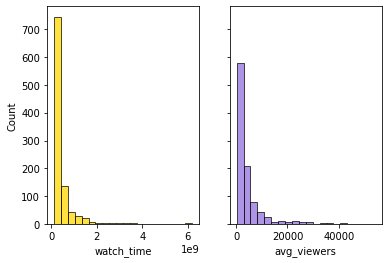

In [22]:
## look at watch time and average viewers
fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = True)
sns.histplot(data['watch_time'], bins = 20, ax = ax1, color = 'gold')
sns.histplot(data['avg_viewers'], bins = 20, ax = ax2, color = 'mediumpurple')

#### The graph on the left is the distribution for a viewer’s watch time in each of the streamer’s stats. The right graph is the distribution for the average viewers of each streamer. The watch time graph has a heavier right skew than the average viewers. The average viewers and watch time graph both have similar distributions, but watch time has some extreme outliers.  


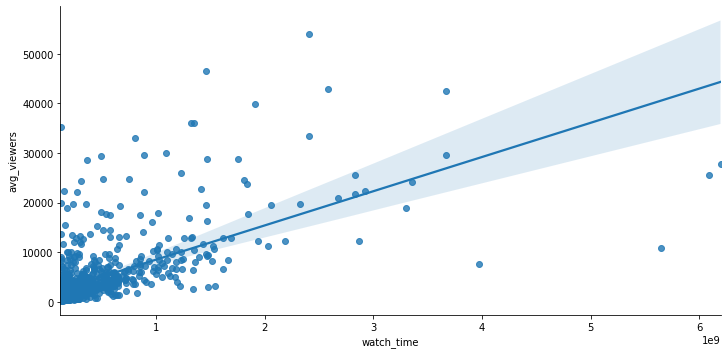

In [23]:
# plot the relationship between the two variables
sns.lmplot(x = 'watch_time', y = 'avg_viewers',
          data = data, aspect = 2, fit_reg = True)

#### With this graph we can see that there is a positive correlation between the two variables. As the watch time of a viewer increases, the average viewers also tends to increase. A majority of the streamers tend to have similar stats so these variable values are mainly within the same range. 

In [24]:
# calculate correlation between watch time and average viewers
correlation2 = data['watch_time'].corr(data['avg_viewers'])
correlation2

0.6290984316953913

#### The correlation between watch time and average viewers is around 0.6291, which is still between 0.5 and 0.7 but higher than the correlation value between follower count and average viewers. Therefore, the two variables can be considered moderately correlated.

### Stream_time & averager_viewers

<AxesSubplot:xlabel='avg_viewers', ylabel='Count'>

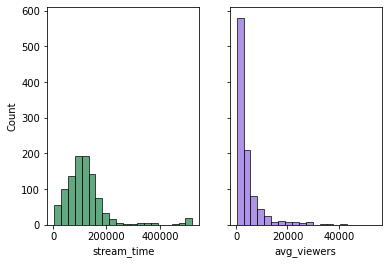

In [25]:
## look at stream time and average viewers
fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = True)
sns.histplot(data['stream_time'], bins = 20, ax = ax1, color = 'seagreen')
sns.histplot(data['avg_viewers'], bins = 20, ax = ax2, color = 'mediumpurple')

#### The graph on the left shows the distribution for the total stream time of each twitch streamer in our dataset. The graph has a bell shaped curve with a right skew. The graph on the right is the distribution for the average viewers of each streamer. This graph has a heavier right skew. Both graphs have a few extreme values which affect the relationship.


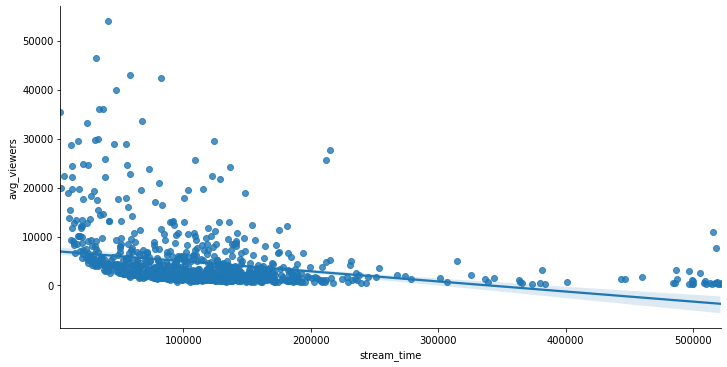

In [26]:
# plot the relationship between the two variables
sns.lmplot(x = 'stream_time', y = 'avg_viewers',
          data = data, aspect = 2, fit_reg = True)

#### With this graph we can see that the relationship between both variables has a slight negative correlation. There is a small decrease in average viewers as the amount of stream time increases. For the most part however, a majority of the values stay within the same range. The average amount of viewers does not seem to change drastically as the stream time increases 

In [27]:
# calculate correlation between stream time and average viewers
correlation3 = data['stream_time'].corr(data['avg_viewers'])
correlation3

-0.29176482544950894

#### The correlation between stream time and average viewers is around -0.2918, which is below 0 and its absolute value is less than 0.3. Therefore, the two variables have little correlation and we should not make stream time a predictor to average viewers.

### Mature & average_viewers

In [28]:
# look at mature and average viewers
# create a df of streams that contain mature contents
mature_stream = data[data['mature'] == True]
mature_stream.shape

(230, 6)

In [29]:
mature_stream.describe()

,watch_time,stream_time,avg_viewers,followers
count,2.300000e+02,230.000000,230.000000,2.300000e+02
mean,3.750076e+08,127537.760870,3518.760870,4.398308e+05
std,5.125772e+08,76565.096844,4464.537623,5.444544e+05
min,1.231253e+08,3645.000000,315.000000,2.881800e+04
25%,1.558581e+08,84363.750000,1264.750000,1.456478e+05
50%,2.143173e+08,120750.000000,2077.500000,2.778125e+05
75%,3.839882e+08,150420.000000,3795.250000,5.210305e+05
max,5.644591e+09,515280.000000,33514.000000,5.265659e+06


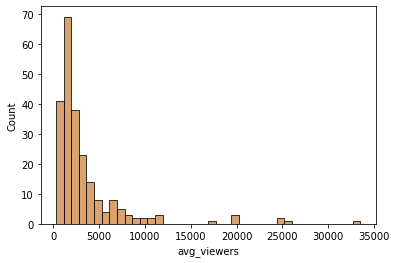

In [30]:
# plot averge_viewers in mature_stream
plot_mature_stream = sns.histplot(mature_stream["avg_viewers"], bins = 40, color = 'peru')

#### The graph above shows the number of mature streamers and their average number of viewers. As we can see, the graph is right skewed with some outliers having a higher number of average viewers.

In [31]:
# create a df of streams that do not contain mature contents
nonmature_stream = data[data['mature'] == False]
nonmature_stream.shape

(768, 6)

In [32]:
nonmature_stream.describe()

,watch_time,stream_time,avg_viewers,followers
count,7.680000e+02,768.000000,768.000000,7.680000e+02
mean,4.301381e+08,118709.589844,4814.908854,6.089688e+05
std,5.600538e+08,87701.358799,6388.309096,8.646907e+05
min,1.221928e+08,3465.000000,235.000000,3.660000e+03
25%,1.668817e+08,70526.250000,1543.750000,1.804810e+05
50%,2.439869e+08,104640.000000,2558.500000,3.353420e+05
75%,4.520527e+08,138315.000000,5131.750000,6.610965e+05
max,6.196162e+09,521445.000000,53986.000000,8.938903e+06


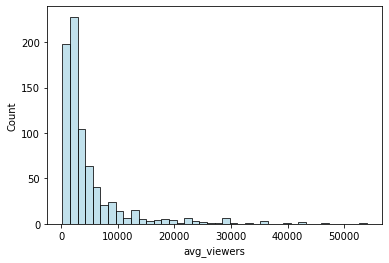

In [33]:
# plot averge_viewers in nonmature_stream
plot_mature_stream = sns.histplot(nonmature_stream["avg_viewers"], bins = 40, color = 'lightblue')

#### This right skewed graph shows the number of non-mature streamers and their average number of viewers. In comparison to mature streamers, non-mature streamers have a much higher number of streamers with a substantial number of average viewers.

Text(0.5, 1.0, 'Non-mature Streamers')

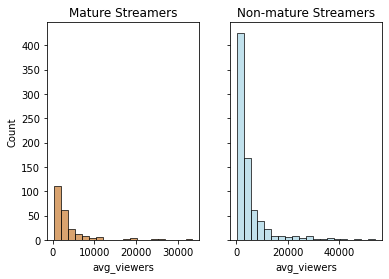

In [34]:
# look at the distributions of average_veiwers 
## look at follower count and average viewers of mature vs. nonmature streams
fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = True)
sns.histplot(mature_stream['avg_viewers'], bins = 20, ax = ax1, color = 'peru')
ax1.set_title('Mature Streamers')
sns.histplot(nonmature_stream['avg_viewers'], bins = 20, ax = ax2, color = 'lightblue')
ax2.set_title('Non-mature Streamers')

#### The two graphs above compare mature vs non-mature streamers in showing number of streamers vs their average number of viewers. As seen in the graph for non-mature streamers, there is a higher streamer count and average number of viewers in comparison to mature streamers showing that non-mature streamers are more popular and gain more viewership on average.


## Normalization

In [35]:
#import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [36]:
# create new df for label conversion and log transformation
df = data
# Because of its negative correlation with average veiwers,
# we drop it from the predictors
df = df.drop('stream_time', 1)

In [37]:
# change mature to float: 0 represents false, 1 represents true
df['mature'] = data['mature'].astype(int)
df['mature'].value_counts()

0    768
1    230
Name: mature, dtype: int64

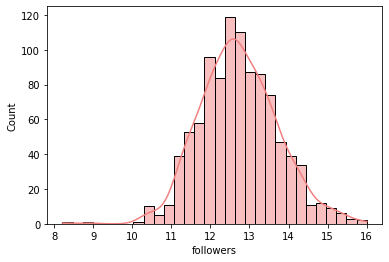

In [38]:
# log transform follower count (log base 2)
# visualize the distributions again
df['followers'] = np.log(data['followers'].values)
plt_follower = sns.histplot(df['followers'], bins = 30, kde=True, color = 'lightcoral')

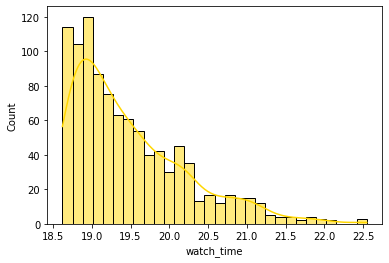

In [39]:
# log transform watch time
df['watch_time'] = np.log(data['watch_time'].values)
plt_watch = sns.histplot(df['watch_time'], bins = 30, kde=True, color = 'gold')

#### As we can see, after log transformation, the distribution of the follower count and watch time become less skewed, the distribution of the follower count resembles a normal distribution.

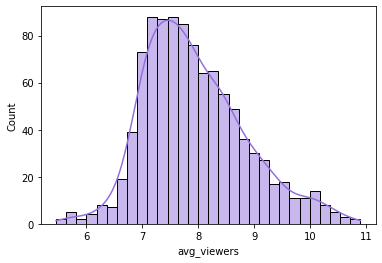

In [40]:
# log transform on average viewers
df['avg_viewers'] = np.log(data['avg_viewers'].values)
plt_avgviewers = sns.histplot(df['avg_viewers'], bins = 30, kde=True, color = 'mediumpurple')

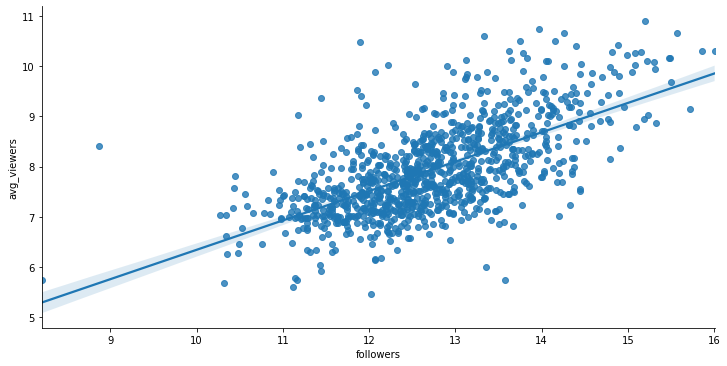

In [41]:
# visualize correlation between the independent variables
#  and the dependent vairable after log transformation
# followers vs. avg_viewers
sns.lmplot(x = 'followers', y = 'avg_viewers',
          data = df, aspect = 2, fit_reg = True)

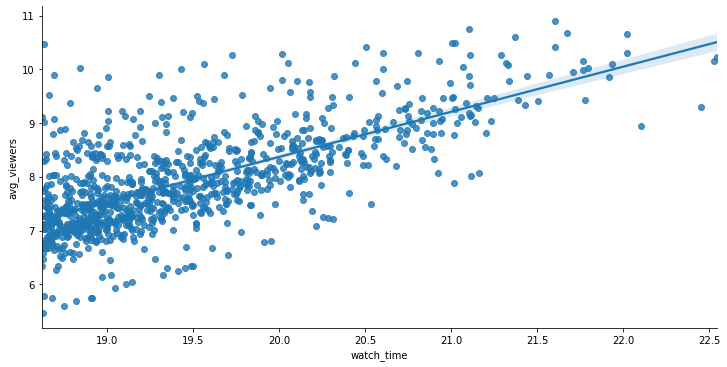

In [42]:
sns.lmplot(x = 'watch_time', y = 'avg_viewers',
          data = df, aspect = 2, fit_reg = True)

In [43]:
# correlation between follower count and average viewers
cor1 = df['followers'].corr(df['avg_viewers'])
cor1

0.6429389858828825

In [44]:
# correlation between watch time and average viewers
cor2 = df['watch_time'].corr(df['avg_viewers'])
cor2

0.6873297201307054

#### Average viewers also become less skewed after log transformation. After we recalculate the correlations, the correlation between follower count and average viewers increases by around 0.08 and the correlation between watch time and average viewers increase by more than 0.06 comparing to the orginal values. The amount of increase is nontrivial and as the correlations between the independent variables and the dependent variable become stronger, we are more likely to observe good performance on linear regression models.

## Build Linear Model
##### In this section, we will experiment with different combinations of the independent variables by building a linear model with each combination, then make predictions with the test set and observe the rmse result. In order to ensure high generalization performance with a small dataset (998 data points after removing 2 outliers), We will use the K-Fold Cross Validation method for training and testing.

In [45]:
# import sklearn libraries
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [46]:
#shuffle the dataframe to ensure randomness
df_shuffled = df.sample(frac=1)
df_shuffled.reset_index()

,index,channel,watch_time,avg_viewers,followers,mature
0,719,VaporaDark,18.945072,7.757051,11.526424,0
1,387,The_Happy_Hob,19.505867,7.949444,12.283524,1
2,682,makataO,18.994540,6.813445,12.878139,0
3,859,MANvsGAME,18.776233,7.651120,13.142813,1
4,908,Sonecarox,18.713173,6.343880,11.379737,1
...,...,...,...,...,...,...
993,918,AlcastHQ,18.698939,8.451053,11.313596,0
994,115,LVNDMARK,20.485543,8.212840,12.424521,0
995,612,KarasMai,19.092606,7.225481,12.548470,0
996,515,Sh4dowehhh,19.252559,7.606885,11.341354,0


In [47]:
# constants: model and label
linear = LinearRegression()
y = df_shuffled['avg_viewers']

In [48]:
# evaluation method
def rmse(test, predictions):
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(np.abs(mse))
    #print('RMSE: %f' % rmse)
    return rmse

In [49]:
# parameter: X is the features matrix, y is the label
# return: average testing rmse in all folds
# use k fold validation, where k=5
def train(X, y, model):
    test_rmse = []
    cv = KFold(n_splits=5)
    for train_index, test_index in cv.split(X):
        X_train, y_train = X.iloc[train_index], y.iloc[train_index]
        X_test, y_test = X.iloc[test_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        test_rmse.append(rmse(y_test, prediction))
    avg_rmse = np.mean(test_rmse)
    return avg_rmse


#### followers + watch_time ~ avg_viewers

In [50]:
# split independent variables
comb1 = ['followers', 'watch_time']
X1 = df_shuffled[comb1]

In [51]:
rmse1= train(X1, y, linear)
print(rmse1)

0.5975425348049944


In [52]:
# try without k-fold validation
X1_train, X1_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.3, shuffle = True, random_state=42)
linear.fit(X1_train, y_train)
prediction = linear.predict(X1_test)
print(rmse(y_test, prediction))

0.6172514961466256


#### The rmse result from K-fold cross validation is around 0.60, while the rmse result from normal train/test split is round 0.62. We will stick with k-fold cross validation methos for better generalization.

#### followers + watch_time + mature ~ avg_viewers

In [53]:
# split independent variables
comb2 = ['followers', 'watch_time', 'mature']
X2 = df_shuffled[comb2]

In [54]:
rmse2 = train(X2, y, linear)
print(rmse2)

0.5968754964251778


#### followers + mature ~ avg_viewers

In [55]:
# split independent variables
comb3 = ['followers', 'mature']
X3 = df_shuffled[comb3]

In [56]:
rmse3 = train(X3, y, linear)
print(rmse3)

0.6933752472158901


#### watch_time + mature ~ avg_viewers

In [57]:
comb4 = ['watch_time', 'mature']
X4 = df_shuffled[comb4]

In [58]:
rmse4 = train(X4, y, linear)
print(rmse4)

0.6543039421028268


#### followers ~ avg_viewers

In [59]:
comb5 = ['followers']
X5 = df_shuffled[comb5]

In [60]:
rmse5 = train(X5, y, linear)
print(rmse5)

0.6942170772065263


#### watch_time ~ avg_viewers

In [61]:
comb6 = ['watch_time']
X6 = df_shuffled[comb6]

In [62]:
rmse6 = train(X6, y, linear)
print(rmse6)

0.6564933386300229


### We can observe from the above 6 models that:
1. The rmse of the third model is the lowest, so using followers, watch time and mature to predict average viewers gives us the best result. 
2. As indicated by the correlation calculations and the rmse values of using follower count and watch time as the predictor respectively (rmse5 and rmse6), we can conclude that watch time is a better predictor than followers and mature. 
3. Mature is the weakest predictor, since adding it makes trivial improvement on performance. Adding it with watch time and followers results in a rmse of 0.5968 (rmse2) versus without it the rmse is 0.5975 (rmse1).

## Build Nonlinear Model
##### Because there is not a quantified threshold on the rmse values for us to mearsure the performance of the predictions, we want to see if using other regression models would improve the performance. From the EDA part we know that the relationships between independent and dependent variables are nonlinear, so we will try to fit the data in nonlinear models. In this section, we will experiment with knn regressor and random forest regressor, observe the testing rmse result and compare to the results of the linear models. 

### KNN Regressor

In [63]:
# knn regressor
from sklearn.neighbors import KNeighborsRegressor

In [64]:
knn = KNeighborsRegressor(n_neighbors=80, weights = 'distance')
rmse_knn = train(X2, y, knn)
rmse_knn

0.6138272237621499

In [65]:
# try without k-fold
X2_train, X2_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.3, shuffle = True, random_state=42)
knn.fit(X2_train, y_train)
prediction = knn.predict(X2_test)
print(rmse(y_test, prediction))

0.6288155270709653


### Random Forest Regressor

In [66]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [67]:
rf = RandomForestRegressor(max_depth=2, random_state=10)
rmse_rf = train(X2, y, rf)
rmse_rf

0.640246856467341

In [68]:
# try without k-fold
rf.fit(X2_train, y_train)
prediction = rf.predict(X2_test)
print(rmse(y_test, prediction))

0.6415443774169493


### The knn regression model's resulting rmse is around 0.61 and the random forest regression model's resulting rmse is around 0.64. Like in the previous section, we also try making predictions with both k-fold cross validation and normal train/test split. The numbers show that k-fold cross validation always result in better test set performance.
### The best prediction is given by linear regression with all three predictors. Even though we tried nonlinear regression models like knn regression and random forest regression, the performance of both models are worse than that of the linear model.

Text(0.5, 1.0, 'Correlation Between Variables')

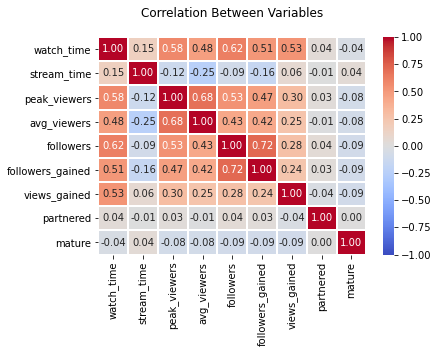

In [69]:
# visualize the correlation between each pair of variables
corr = dataset.corr()
sns.heatmap(corr, vmin=-1, vmax=1, cmap = 'coolwarm', annot=True, fmt='.2f', linewidths=0.1)
plt.title("Correlation Between Variables", pad=20)

#### Here we try to visualize the correlation between all of the variables with a heat map, we can observe that the top correlated variables to average viewers are: peak viewers, watch time, followers and followers gained. At the start of this project, we formulated the research question and chose the independent variables based solely on deduction. If we use the top correlated variables as predictors, it is very likely that the rmse value would drop by a significant amount.

# Ethics & Privacy

The dataset we will be using for our project contains the top 1000 streamers for the year 2021. There is no personal bias for what kinds of people or games are chosen in the datasets because the rankings are solely based on the numerical statistics of the streamers. The information for these statistics is also public information so we will not have conflicts in using the data for our project. The current dataset we are using contains the names of the streamers which we have decided not to remove. Although the names are not necessarily needed for our project, these streamers are public figures so keeping their names is not a concern for privacy. The dataset also does not contain the personal information for the viewers of each streamer. Had their names been included in the dataset we would have had to remove them because these people are not public figures. Overall, the dataset does not have any privacy conflicts. 

# Conclusion & Discussion

The purpose of our project was to discover what would make a successful streamer and maintain a sizable viewership so that the streamer would be able to sign a contract with Twitch. We hypothesized that the number of followers, mature content, and the watch time of the twitch streamer would be the best predictor of the average viewers and that the number of followers has the strongest impact on the average viewers. The results of our linear regression model displayed that our hypothesis was wrong. The strongest impact on average viewership of the variables that we used was watch time.

We utilized Root Mean Square Error(RMSE) to judge how far off our predicted average viewer number was from the actual predicted average viewer for each streamer. The acceptable range for an accurate model’s RMSE is 0.2 to 0.5 which we were not able to reach with our models with our best model using followers, watch time, and mature content to predict the average viewers having a RMSE of 0.596875. After reviewing our models, we realized that some of the variables that we removed from our dataset because we reasoned that they would be outliers actually had the highest correlations for average viewers. We reasoned that if we utilized those variables in our prediction model, we probably could have produced an accurate prediction model. We have several limitations in the frame of our project. The first limitation of the project was the size of the dataset. Our dataset consisted of only 1000 data points which was reduced after removing outliers from the dataset. If we have a larger amount of data points, our model could have been more robust and predicted the average amount of viewers more accurately. Another limitation was our understanding of RMSE to analyze our results which makes it hard for us to know whether our model is accurate. 

The social importance of our project was to break down specifically what variables contribute to the success of streamers. As streaming becomes an increasingly sought after career path, it is important to understand these variables in order to maximize success. Although we were not able to cover all variables that might lead to successful streaming, we hope that we have contributed to the understanding of what can predict success in a streaming career.


# Team Contributions



- Sarah Parrilla: Submitted Project Review. Wrote the Background, Overview, Prior Work. Wrote parts of Data Checkpoint, and EDA checkpoint. Final project video submission. 
- Anush Ghoogasian: Project Proposal: Background/Prior Work and Team Expectations; Data Checkpoint: comments;EDA Checkpoint: comments and analysis on correlation and scatter plot. Final Project: Previous contributions + Contributed to discussion + helped make sure all requirements were met/checklist was complete. Overall: organized meeting times and zoom links.
- Dayana Casas: Ethics and Privacy, Data Checkpoint: helped with data cleaning description, EDA Checkpoint: wrote graph descriptions for watchtime & avg viewers and streamtime & avg viewers, Final Project: Previous contributions
- Andrew Zhou: Created Research question and Hypothesis and discovered dataset. Contributed to Background and Privacy/Ethics. Contributed to Data Checkpoint and Data Analysis, and EDA. Wrote Conclusion and Discussion in the Final Report. 
- Xingyu Zhu: All github submission,
    Project Proposal: data description and timeline; 
    Data Checkpoint: code and comments; 
    EDA Checkpoint: code, comments and analysis on correlation and scatterplot; 
    Final Checkpoint: code, comments and markdown texts in Normalization, Linear Model and Nonlinear Model sections.